In [1]:
import networkx as nx
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import networkx as nx
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import igraph as ig
from modularity_maximization import partition
from modularity_maximization.utils import get_modularity
from modutils import mod_calc
device = torch.device('cpu')

In [2]:
G = nx.read_gml("datasets/polbooks.gml", label = 'id')
print(nx.info(G))
comm_dict = partition(G)
clusters_number = len(np.array(list(set(comm_dict.values())))) #set the number of clusters required here

Name: 
Type: Graph
Number of nodes: 105
Number of edges: 441
Average degree:   8.4000


In [3]:
A_hat = nx.adjacency_matrix(G).todense()
X = np.identity(G.number_of_nodes(), dtype=np.float)  

In [4]:
class CDCGS(nn.Module):
    def __init__(self, A_hat, num_feat, num_hidden):
        super(CDCGS, self).__init__()
        self.num_feat = num_feat
        self.num_hidden = num_hidden
        self.A_hat = A_hat
        self.W_0 = nn.Parameter(torch.ones(num_feat, num_hidden))
        I = F.one_hot(torch.tensor(random.sample(range(0, num_feat), num_feat)), num_classes=num_feat)
        self.I = torch.tensor(I,dtype=torch.float)

    def forward(self, X, A_hat,temp):
        global featureSelector
        global weight_feature
        featureSelector = self.W_0
        results = torch.zeros(self.W_0.size())
        x = 500
        for i in range(x):
            results += F.gumbel_softmax(self.W_0,tau=temp,hard=False)
        weight_feature = results/x

        H = torch.mm(torch.mm(self.I,A_hat),self.I.T)
        H = torch.mm(torch.mm(weight_feature.T,A_hat),weight_feature)
        H = torch.div(H, H.sum(axis=0))
        m = nn.Softmax(dim=0)
        return m(H)

num_feat = len(G.nodes())
num_hidden = clusters_number

model = CDCGS(A_hat, num_feat, num_hidden).to(device)

def lossFn(output,exp): 
    return torch.sum((torch.diag(-torch.log(output))))

optimizer = optim.Adam(model.parameters(),lr=1e-2,weight_decay=0,betas=(0.5, 0.999), eps=1e-08)


A_hat_tensor = torch.Tensor(A_hat).to(device)
X_tensor = torch.Tensor(X).to(device)
#y_tensor = torch.LongTensor(y).to(device)    

#print(y_tensor)
loss_hist = []
acc_hist = []
temp = 3

for epoch in range(750):
    model.train()
    model.zero_grad()
    if(epoch == 75):
        temp = 2.5
    elif(epoch == 100):
        temp = 2
    elif(epoch == 150):
        temp = 1.5
    elif(epoch == 200):
        temp = 1
    elif(epoch == 300):
        temp = 0.5
    elif(epoch == 400):
        temp = 0.3
    elif(epoch == 500):
        temp = 0.2
    elif(epoch == 600):
        temp = 0.1
    output = model(X_tensor, A_hat_tensor,temp)
    loss = lossFn(output,torch.diag(torch.ones(output.size()[0])))
    loss_hist.append(loss.item())
    print('loss',epoch,loss)
    loss.backward()
    optimizer.step()

/opt/anaconda/envs/Deepak/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


loss 0 tensor(5.5452, grad_fn=<SumBackward0>)
loss 1 tensor(5.5452, grad_fn=<SumBackward0>)
loss 2 tensor(5.5452, grad_fn=<SumBackward0>)
loss 3 tensor(5.5452, grad_fn=<SumBackward0>)
loss 4 tensor(5.5452, grad_fn=<SumBackward0>)
loss 5 tensor(5.5451, grad_fn=<SumBackward0>)
loss 6 tensor(5.5451, grad_fn=<SumBackward0>)
loss 7 tensor(5.5451, grad_fn=<SumBackward0>)
loss 8 tensor(5.5449, grad_fn=<SumBackward0>)
loss 9 tensor(5.5448, grad_fn=<SumBackward0>)
loss 10 tensor(5.5447, grad_fn=<SumBackward0>)
loss 11 tensor(5.5445, grad_fn=<SumBackward0>)
loss 12 tensor(5.5442, grad_fn=<SumBackward0>)
loss 13 tensor(5.5438, grad_fn=<SumBackward0>)
loss 14 tensor(5.5436, grad_fn=<SumBackward0>)
loss 15 tensor(5.5430, grad_fn=<SumBackward0>)
loss 16 tensor(5.5427, grad_fn=<SumBackward0>)
loss 17 tensor(5.5421, grad_fn=<SumBackward0>)
loss 18 tensor(5.5413, grad_fn=<SumBackward0>)
loss 19 tensor(5.5403, grad_fn=<SumBackward0>)
loss 20 tensor(5.5397, grad_fn=<SumBackward0>)
loss 21 tensor(5.5392, 

loss 173 tensor(4.5840, grad_fn=<SumBackward0>)
loss 174 tensor(4.5784, grad_fn=<SumBackward0>)
loss 175 tensor(4.5721, grad_fn=<SumBackward0>)
loss 176 tensor(4.5641, grad_fn=<SumBackward0>)
loss 177 tensor(4.5588, grad_fn=<SumBackward0>)
loss 178 tensor(4.5507, grad_fn=<SumBackward0>)
loss 179 tensor(4.5423, grad_fn=<SumBackward0>)
loss 180 tensor(4.5339, grad_fn=<SumBackward0>)
loss 181 tensor(4.5276, grad_fn=<SumBackward0>)
loss 182 tensor(4.5191, grad_fn=<SumBackward0>)
loss 183 tensor(4.5120, grad_fn=<SumBackward0>)
loss 184 tensor(4.5038, grad_fn=<SumBackward0>)
loss 185 tensor(4.4996, grad_fn=<SumBackward0>)
loss 186 tensor(4.4907, grad_fn=<SumBackward0>)
loss 187 tensor(4.4812, grad_fn=<SumBackward0>)
loss 188 tensor(4.4742, grad_fn=<SumBackward0>)
loss 189 tensor(4.4721, grad_fn=<SumBackward0>)
loss 190 tensor(4.4575, grad_fn=<SumBackward0>)
loss 191 tensor(4.4495, grad_fn=<SumBackward0>)
loss 192 tensor(4.4429, grad_fn=<SumBackward0>)
loss 193 tensor(4.4346, grad_fn=<SumBack

loss 344 tensor(3.6443, grad_fn=<SumBackward0>)
loss 345 tensor(3.6418, grad_fn=<SumBackward0>)
loss 346 tensor(3.6424, grad_fn=<SumBackward0>)
loss 347 tensor(3.6424, grad_fn=<SumBackward0>)
loss 348 tensor(3.6433, grad_fn=<SumBackward0>)
loss 349 tensor(3.6439, grad_fn=<SumBackward0>)
loss 350 tensor(3.6424, grad_fn=<SumBackward0>)
loss 351 tensor(3.6374, grad_fn=<SumBackward0>)
loss 352 tensor(3.6421, grad_fn=<SumBackward0>)
loss 353 tensor(3.6405, grad_fn=<SumBackward0>)
loss 354 tensor(3.6379, grad_fn=<SumBackward0>)
loss 355 tensor(3.6407, grad_fn=<SumBackward0>)
loss 356 tensor(3.6392, grad_fn=<SumBackward0>)
loss 357 tensor(3.6413, grad_fn=<SumBackward0>)
loss 358 tensor(3.6389, grad_fn=<SumBackward0>)
loss 359 tensor(3.6372, grad_fn=<SumBackward0>)
loss 360 tensor(3.6375, grad_fn=<SumBackward0>)
loss 361 tensor(3.6379, grad_fn=<SumBackward0>)
loss 362 tensor(3.6394, grad_fn=<SumBackward0>)
loss 363 tensor(3.6402, grad_fn=<SumBackward0>)
loss 364 tensor(3.6369, grad_fn=<SumBack

loss 516 tensor(3.6173, grad_fn=<SumBackward0>)
loss 517 tensor(3.6156, grad_fn=<SumBackward0>)
loss 518 tensor(3.6142, grad_fn=<SumBackward0>)
loss 519 tensor(3.6172, grad_fn=<SumBackward0>)
loss 520 tensor(3.6159, grad_fn=<SumBackward0>)
loss 521 tensor(3.6152, grad_fn=<SumBackward0>)
loss 522 tensor(3.6176, grad_fn=<SumBackward0>)
loss 523 tensor(3.6162, grad_fn=<SumBackward0>)
loss 524 tensor(3.6159, grad_fn=<SumBackward0>)
loss 525 tensor(3.6135, grad_fn=<SumBackward0>)
loss 526 tensor(3.6135, grad_fn=<SumBackward0>)
loss 527 tensor(3.6154, grad_fn=<SumBackward0>)
loss 528 tensor(3.6146, grad_fn=<SumBackward0>)
loss 529 tensor(3.6142, grad_fn=<SumBackward0>)
loss 530 tensor(3.6139, grad_fn=<SumBackward0>)
loss 531 tensor(3.6154, grad_fn=<SumBackward0>)
loss 532 tensor(3.6141, grad_fn=<SumBackward0>)
loss 533 tensor(3.6150, grad_fn=<SumBackward0>)
loss 534 tensor(3.6147, grad_fn=<SumBackward0>)
loss 535 tensor(3.6145, grad_fn=<SumBackward0>)
loss 536 tensor(3.6144, grad_fn=<SumBack

loss 687 tensor(3.6058, grad_fn=<SumBackward0>)
loss 688 tensor(3.6069, grad_fn=<SumBackward0>)
loss 689 tensor(3.6083, grad_fn=<SumBackward0>)
loss 690 tensor(3.6062, grad_fn=<SumBackward0>)
loss 691 tensor(3.6057, grad_fn=<SumBackward0>)
loss 692 tensor(3.6051, grad_fn=<SumBackward0>)
loss 693 tensor(3.6065, grad_fn=<SumBackward0>)
loss 694 tensor(3.6077, grad_fn=<SumBackward0>)
loss 695 tensor(3.6050, grad_fn=<SumBackward0>)
loss 696 tensor(3.6045, grad_fn=<SumBackward0>)
loss 697 tensor(3.6059, grad_fn=<SumBackward0>)
loss 698 tensor(3.6093, grad_fn=<SumBackward0>)
loss 699 tensor(3.6080, grad_fn=<SumBackward0>)
loss 700 tensor(3.6071, grad_fn=<SumBackward0>)
loss 701 tensor(3.6076, grad_fn=<SumBackward0>)
loss 702 tensor(3.6064, grad_fn=<SumBackward0>)
loss 703 tensor(3.6072, grad_fn=<SumBackward0>)
loss 704 tensor(3.6068, grad_fn=<SumBackward0>)
loss 705 tensor(3.6085, grad_fn=<SumBackward0>)
loss 706 tensor(3.6078, grad_fn=<SumBackward0>)
loss 707 tensor(3.6068, grad_fn=<SumBack

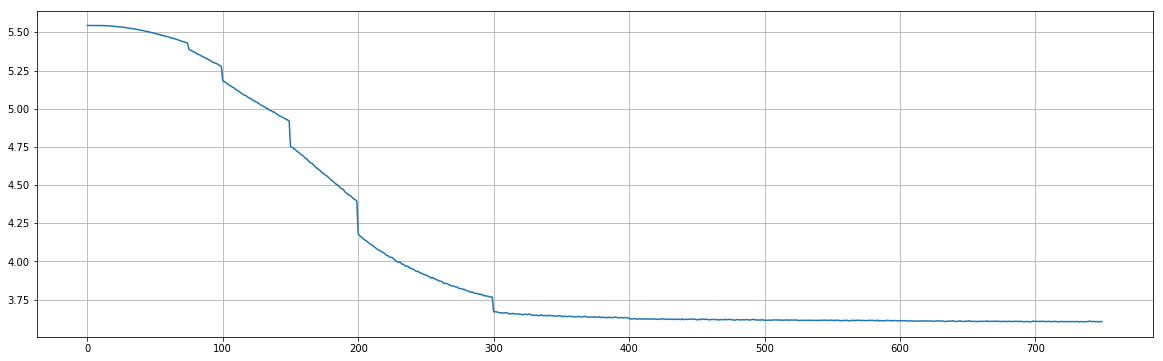

In [5]:
plt.figure(figsize=(20, 6))
plt.plot(loss_hist)
plt.grid(True)
plt.show()

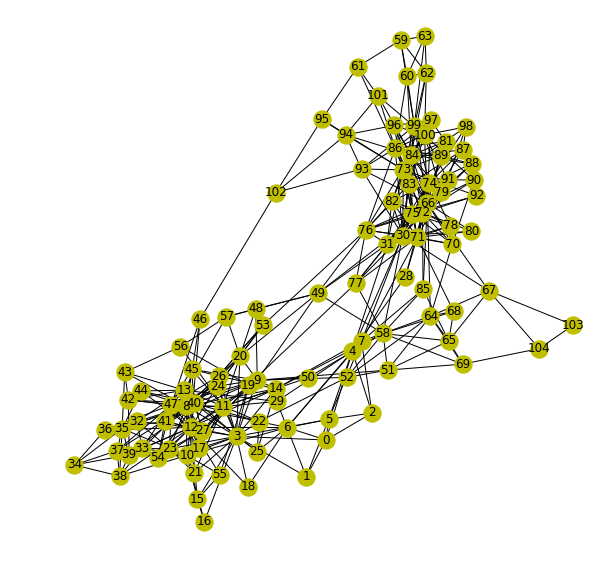

Modularity for PolBooks dataset is 0.52083


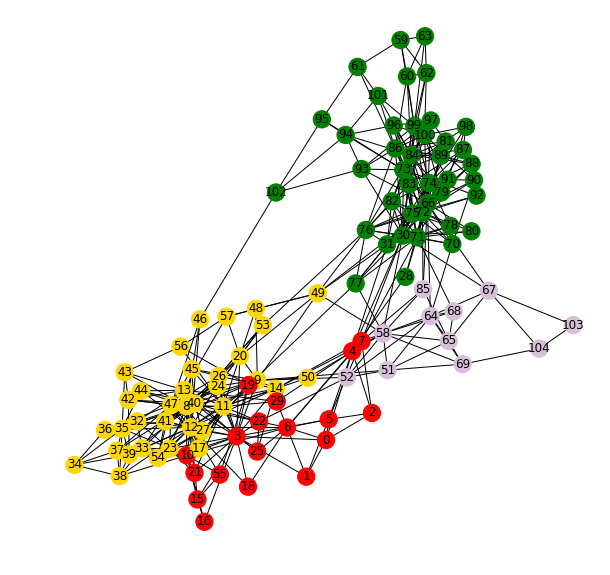

In [14]:
gumbel_matrix = weight_feature.detach().max(dim=1)[1]
labels_pred = gumbel_matrix.data.numpy()

pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
plt.axis('off')
#nx.draw(G, pos=pos, node_size=200, node_color=color, with_labels=True)
nx.draw_networkx(G, pos=pos, node_color="y",node_size=300, with_labels=True)
plt.show()

print('Modularity for PolBooks dataset is %.5f'%mod_calc(G,'Polbooks',labels_pred))

color = []
for c in range(len(gumbel_matrix)):
    if(gumbel_matrix[c] == 0):
        color.append('r')
    elif(gumbel_matrix[c] == 1):
        color.append('g')
    elif(gumbel_matrix[c] == 2):
        color.append('thistle')
    elif(gumbel_matrix[c] == 3):
        color.append('gold')
plt.figure(figsize=(10, 10))
plt.axis('off')
nx.draw_networkx(G, pos=pos, node_size=300, node_color=color, with_labels=True)
plt.show()